Q1) Load the dataset and print the shape of the data that you imported.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the dataset into eneryDF and Shape of energyDF
colNames = ['AT','EV','AP','RH','PE']
energyDF = pd.read_csv("energy_output.csv", names =colNames)
energyDF.shape # shape is 9568 instances with 5 features


(9568, 5)

Q2) Display the first 12 lines of the dataset with all the columns.

In [2]:
# First 12 lines of the energyDF
energyDF.head(12)

# Alternative 
print(energyDF.iloc[:12])


       AT     EV       AP     RH      PE
0   14.96  41.76  1024.07  73.17  463.26
1   25.18  62.96  1020.04  59.08  444.37
2    5.11  39.40  1012.16  92.14  488.56
3   20.86  57.32  1010.24  76.64  446.48
4   10.82  37.50  1009.23  96.62  473.90
5   26.27  59.44  1012.23  58.77  443.67
6   15.89  43.96  1014.02  75.24  467.35
7    9.48  44.71  1019.12  66.43  478.42
8   14.64  45.00  1021.78  41.25  475.98
9   11.74  43.56  1015.14  70.72  477.50
10  17.99  43.72  1008.64  75.04  453.02
11  20.14  46.93  1014.66  64.22  453.99


Q3) Separate out the independent and dependent variables and store them into X and y.

In [3]:
X = energyDF.iloc[:, 0:4].values
y = energyDF.iloc[:, -1].values

print(X)
print(y)

[[  14.96   41.76 1024.07   73.17]
 [  25.18   62.96 1020.04   59.08]
 [   5.11   39.4  1012.16   92.14]
 ...
 [  31.32   74.33 1012.92   36.48]
 [  24.48   69.45 1013.86   62.39]
 [  21.6    62.52 1017.23   67.87]]
[463.26 444.37 488.56 ... 429.57 435.74 453.28]


Q4) Split the dataset into training (80%) and testing (20%).

In [4]:
#Splitting the data into Training Set and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)


Q5) Plot a scatter plot of Ambient Temperature (X-axis) and energy output (Y-axis). What kind of a relationship exists between the two? (i.e. linear, non-linear, strong, weak).

Text(0, 0.5, 'Energy Output')

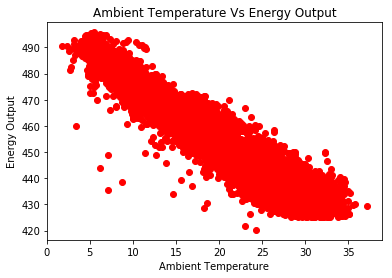

In [5]:
# Scatter plot of Ambient Temperature (X-axis) and energy output (Y-axis)
plt.scatter(energyDF['AT'],y, color='red')
plt.title('Ambient Temperature Vs Energy Output')
plt.xlabel('Ambient Temperature')
plt.ylabel('Energy Output')


# The relationship between the two is linear (negative), strong

Q6) Plot a scatter plot of Exhaust Vacuum (X-axis) and energy output (Y-axis). What kind of a relationship exists between the two? (i.e. linear, non-linear, strong, weak).

Text(0, 0.5, 'Energy Output')

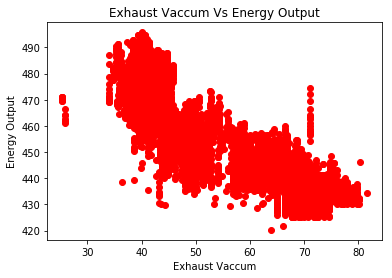

In [6]:
# Scatter plot of Exhaust Vacuum (X-axis) and energy output (Y-axis)
plot = plt.scatter(energyDF['EV'],y,color='red')
plt.title('Exhaust Vaccum Vs Energy Output')
plt.xlabel('Exhaust Vaccum')
plt.ylabel('Energy Output')

# The relationship between the two is linear (negative), weak

Q7) Plot a scatter plot of Ambient Pressure (X-axis) and energy output (Y-axis). What kind of a relationship exists between the two? (i.e. linear, non-linear, strong, weak).

Text(0, 0.5, 'Energy Output')

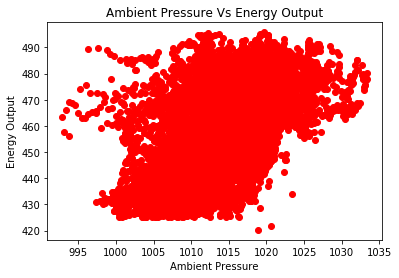

In [7]:
# Scatter plot of Ambient Pressure (X-axis) and energy output (Y-axis)
plot = plt.scatter(energyDF['AP'],y, color='red')
plt.title('Ambient Pressure Vs Energy Output')
plt.xlabel('Ambient Pressure')
plt.ylabel('Energy Output')

# The relationship between the two is linear & weak

Q8) Plot a scatter plot of Relative Humidity (X-axis) and energy output (Y-axis). What kind of a relationship exists between the two? (i.e. linear, non-linear, strong, weak).

Text(0, 0.5, 'Energy Output')

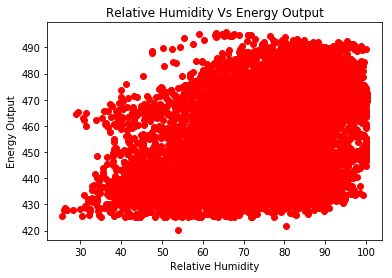

In [8]:
# Scatter plot of Relative Humidity (X-axis) and energy output (Y-axis)
plot = plt.scatter(energyDF['RH'],y, color='red')
plt.title('Relative Humidity Vs Energy Output')
plt.xlabel('Relative Humidity')
plt.ylabel('Energy Output')

# The relationship between the two is Non-linear

Q9) Fit a LinearRegression Model using the 4 independent variables.

In [9]:
# Fitting Multiple Linear Regression to Training Set
from sklearn.linear_model import LinearRegression
mlrObj = LinearRegression()
mlrObj.fit(X_train,y_train)

#Prediction on the Test Set
y_pred = mlrObj.predict(X_test)

print(y_pred)
print(y_test)

[431.42761597 458.56124622 462.75264705 ... 469.51835895 442.41759454
 461.88279939]
[431.23 460.01 461.14 ... 473.26 438.   463.28]


Q10) Print the model coefficients. That is, the intercept and 4 coefficients for the 4 independent variables.

In [10]:
# The coefficients w0, w1, w2, w3
print('Coefficients: \n', mlrObj.coef_)

# Alternative - using OLS

import statsmodels.formula.api as sm

# Adding Ones
X = np.append(arr=np.ones((9568,1)).astype(int),values=X,axis=1)

X_sig = X[:,[0,1,2,3,4]]
obj_OLS = sm.OLS(endog=y, exog=X_sig).fit()
obj_OLS.summary()

# Coefficients: 
# w0 = -1.97313099 
# w1 = -0.23649993  
# w2 = 0.06387891 
# w3 = -0.15807019]

Coefficients: 
 [-1.97313099 -0.23649993  0.06387891 -0.15807019]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Sun, 17 Mar 2019   Prob (F-statistic):               0.00
Time:                        08:56:30   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.000     435.500     473.718
x1            -1.9775      0.015   -129.342      0.000      -2.007      -1.948
x2            -0.2339      0.007    -32.122      0.000      -0.248      -0.220
x3             0.0621      0.009      6.564      0.000       0.044       0.081
x4            -0.1581      0.004    -37.918      0.000      -0.166      -0.150
==============================================================================
Omnibus:                      892.002   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4086.777
Skew:                          -0.352   Prob(JB):                         0.00
Kurtosis:                       6.123   Cond. No.                     2.13e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Q11) What is the Mean Squared Error of the model on the test set?

In [11]:
# Mean Squared Error of the model on the test set
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(mse)

19.73369930349764
